In [1]:
import keras
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_data


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
labels = train_data.iloc[:,0].values

In [6]:
labels

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [7]:
features = train_data.iloc[:,1:].values.reshape(len(train_data),28,28,1) # convolution requires in 4d, each row represent an image of size 28 X 28 X 1 channel is 1 cuz the image is b/w

In [8]:
features


array([[[[0],
         [0],
         [0],
         ..., 
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ..., 
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ..., 
         [0],
         [0],
         [0]],

        ..., 
        [[0],
         [0],
         [0],
         ..., 
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ..., 
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ..., 
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ..., 
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ..., 
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ..., 
         [0],
         [0],
         [0]],

        ..., 
        [[0],
         [0],
         [0],
         ..., 
    

In [9]:
labels = keras.utils.to_categorical(labels, num_classes = 10)

In [10]:
labels
labels.shape

(42000, 10)

In [11]:
labels = np.array(labels)
labels.shape
features = np.array(features)
features.shape

(42000, 28, 28, 1)

In [12]:
# splitting train test data
train_x, test_x, train_y, test_y = train_test_split(features,labels, test_size = 0.2, random_state=1)

In [13]:
train_x.shape


(33600, 28, 28, 1)

In [14]:
# Model

def LeNet(length, width, output, channels):
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'same', 
                     activation ='relu', input_shape = (28,28,1)))
    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation = "softmax"))
    return model

In [15]:
model = LeNet(28,28,10,1)

In [16]:

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [17]:
# train the model
model.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])

In [ ]:
epochs = 1

In [52]:
model.fit(train_x,train_y,validation_data=(test_x,test_y),epochs=epochs)

Train on 33600 samples, validate on 8400 samples
Epoch 1/1
33600/33600 [==============================] - 248s 7ms/step - loss: 0.0539 - acc: 0.9905 - val_loss: 0.0520 - val_acc: 0.9902


In [53]:
model.save_weights('cnn_mnist_digit111.h5')

In [54]:

model.load_weights('cnn_mnist_digit111.h5')

In [55]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
test_set = test_data.iloc[:,:].values.reshape(len(test_data),28,28,1)

In [57]:
test_set

array([[[[0],
         [0],
         [0],
         ..., 
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ..., 
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ..., 
         [0],
         [0],
         [0]],

        ..., 
        [[0],
         [0],
         [0],
         ..., 
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ..., 
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ..., 
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ..., 
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ..., 
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ..., 
         [0],
         [0],
         [0]],

        ..., 
        [[0],
         [0],
         [0],
         ..., 
    

In [58]:
prediction = model.predict(test_set)

In [59]:
prediction = np.argmax(prediction, axis=1)
prediction

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [60]:
#for Kaggle: Writing prediction to CSV File
df = pd.DataFrame({
    'S.N.' : list(range(1,len(prediction)+1)),
    'Output' : prediction
})

df.to_csv("prediction4.csv", index=False, header=True)

In [61]:
#testing single image
test_x = test_data.iloc[2, :].values.reshape(1,28, 28, 1)


In [62]:
single_prediction = model.predict(test_x)
single_prediction

array([[  4.02069735e-13,   8.48566077e-15,   2.30958807e-13,
          4.93073813e-16,   2.59179700e-07,   4.17903255e-12,
          4.63680404e-14,   8.19192668e-15,   5.14708702e-08,
          9.99999642e-01]], dtype=float32)

In [63]:
print("Your Predicted Number is: {}".format(np.argmax(single_prediction, axis=1)))

Your Predicted Number is: [9]


In [64]:
#viewing the image
test_x = test_data.iloc[2, :].values
test_x = np.array(test_x)
test_x = test_x.reshape(28,28)

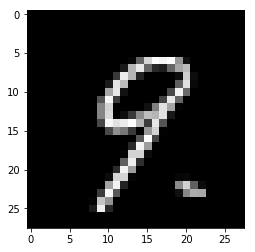

In [65]:
plt.imshow(test_x, cmap='gray');